<a href="https://colab.research.google.com/github/Radu1999/Regression-algorithms/blob/main/Tema2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dataset retrieval

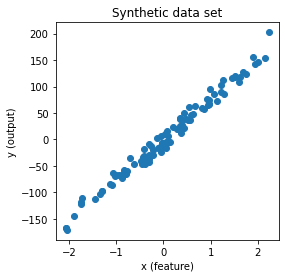

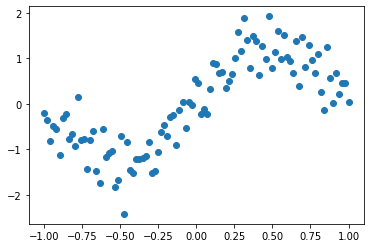

In [ ]:
from sklearn import datasets
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split


# Simple dataset
n_samples = 100
n_features = 1
noise = 10
X, y = datasets.make_regression(n_samples=n_samples, n_features=n_features, n_informative=1, noise=noise, random_state=37)
fig = plt.figure(figsize=(4, 4))
plt.xlabel("x (feature)")
plt.ylabel("y (output)")
plt.title("Synthetic data set")
plt.scatter(X, y)
plt.show()

# Complex dataset
x = np.linspace(-1, 1, n_samples) # coordinates
noise_sample = np.random.normal(0,0.5,n_samples)
sine_wave = x + np.sin(4*x) + noise_sample
plt.plot(x, sine_wave, 'o');
plt.show()

Closed form solution


In [ ]:
class LinearRegression(object):

    def fit(self, X, t):
        self.t = t
        self.w = np.linalg.pinv(X) @ t

    def predict(self, X):
        self.y = X @ self.w
        return self.y
    
    def get_error(self, predicted, true, type_error):
        if type_error == "MSE":
          return np.mean(np.square(predicted - true))
        if type_error == "RMSE":
          return np.sqrt(np.mean(np.square(predicted - true)))

def extract_polynomial_features(X, M):
    phi = np.array(list(map(lambda x: x ** range(M + 1), X)))
    return phi

Error for training MSE: 76.49639207334096
Error for training RMSE: 8.746221588396955
Error for testing MSE: 165.7128111032238
Error for testing RMSE: 12.872948811489302


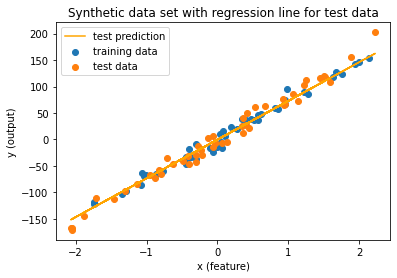

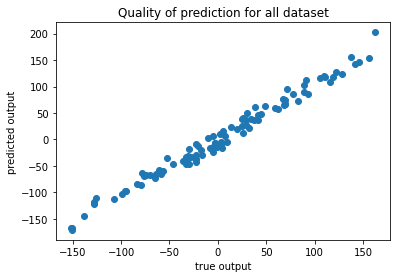

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.5)

X_train_feat = extract_polynomial_features(X_train, 1)
X_test_feat = extract_polynomial_features(X_test, 1)

model = LinearRegression()
model.fit(X_train_feat, y_train)

predict_train = model.predict(X_train_feat)
print(f'Error for training MSE: {model.get_error(predict_train, y_train, "MSE")}')
print(f'Error for training RMSE: {model.get_error(predict_train, y_train, "RMSE")}')

predict_test = model.predict(X_test_feat)
print(f'Error for testing MSE: {model.get_error(predict_test, y_test, "MSE")}')
print(f'Error for testing RMSE: {model.get_error(predict_test, y_test, "RMSE")}')





plt.scatter(X_train, y_train, label="training data")
plt.xlabel("x (feature)")
plt.ylabel("y (output)")
plt.title("Synthetic data set with regression line for test data")
plt.plot(X_test, predict_test, label="test prediction", color="orange")
plt.scatter(X_test, y_test, label="test data")
#plt.plot(X_train, predict_train, label="trained prediction", color="red")
plt.legend()
plt.show()


X_feat = extract_polynomial_features(X, 1)
predict = model.predict(X_feat)
plt.scatter(predict, y)
plt.xlabel("true output")
plt.ylabel("predicted output")
plt.title("Quality of prediction for all dataset")
plt.show()


Test closed form solution without poly features for complex data set

Error for training MSE: 0.33460610612856734
Error for training RMSE: 0.5784514725787872
Error for testing MSE: 0.7583616794621598
Error for testing RMSE: 0.7583616794621598


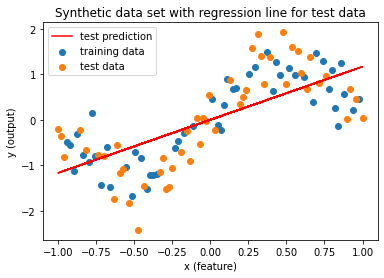

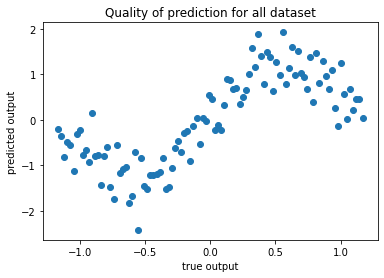

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, sine_wave, test_size=0.5)

X_train_feat = extract_polynomial_features(X_train, 1)
X_test_feat = extract_polynomial_features(X_test, 1)

model = LinearRegression()
model.fit(X_train_feat, y_train)

predict_train = model.predict(X_train_feat)
print(f'Error for training MSE: {model.get_error(predict_train, y_train, "MSE")}')
print(f'Error for training RMSE: {model.get_error(predict_train, y_train, "RMSE")}')

predict_test = model.predict(X_test_feat)
print(f'Error for testing MSE: {model.get_error(predict_test, y_test, "RMSE")}')
print(f'Error for testing RMSE: {model.get_error(predict_test, y_test, "RMSE")}')

plt.scatter(X_train, y_train, label="training data")
plt.xlabel("x (feature)")
plt.ylabel("y (output)")
plt.title("Synthetic data set with regression line for test data")
plt.plot(X_test, predict_test, label="test prediction", color="red")
plt.scatter(X_test, y_test, label="test data")
#plt.plot(X_train, predict_train, label="trained prediction", color="red")
plt.legend()
plt.show()


X_feat = extract_polynomial_features(x, 1)
predict = model.predict(X_feat)
plt.scatter(predict, sine_wave)
plt.xlabel("true output")
plt.ylabel("predicted output")
plt.title("Quality of prediction for all dataset")
plt.show()


Expand features to polynomial form to check for a better fit

Error for training MSE: 0.14179542569951203
Error for training RMSE: 0.37655733388092716
Error for testing MSE: 0.1613602675424332
Error for testing RMSE: 0.40169673578762527


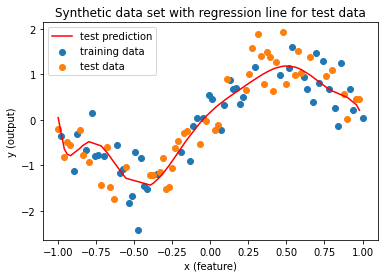

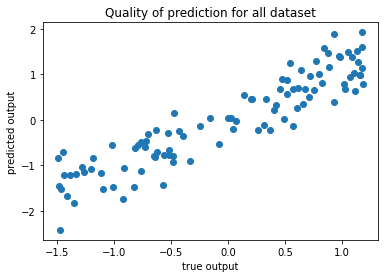

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, sine_wave, test_size=0.5)


M = 10 #@param {type: "slider", default: 8, min: 1, max: 50}
X_train_feat = extract_polynomial_features(X_train, M)
X_test_feat = extract_polynomial_features(X_test, M)

model = LinearRegression()
model.fit(X_train_feat, y_train)

predict_train = model.predict(X_train_feat)
print(f'Error for training MSE: {model.get_error(predict_train, y_train, "MSE")}')
print(f'Error for training RMSE: {model.get_error(predict_train, y_train, "RMSE")}')

predict_test = model.predict(X_test_feat)
print(f'Error for testing MSE: {model.get_error(predict_test, y_test, "MSE")}')
print(f'Error for testing RMSE: {model.get_error(predict_test, y_test, "RMSE")}')

plt.scatter(X_train, y_train, label="training data")
plt.xlabel("x (feature)")
plt.ylabel("y (output)")
plt.title("Synthetic data set with regression line for test data")
xt, yt = zip(*sorted(zip(X_test, predict_test)))
plt.plot(xt, yt, label="test prediction", color="red")
plt.scatter(X_test, y_test, label="test data")
#plt.plot(X_train, predict_train, label="trained prediction", color="red")
plt.legend()
plt.show()


X_feat = extract_polynomial_features(x, M)
predict = model.predict(X_feat)
plt.scatter(predict, sine_wave)
plt.xlabel("true output")
plt.ylabel("predicted output")
plt.title("Quality of prediction for all dataset")
plt.show()


Gradient Descent


In [ ]:
class LinearRegressionGD(object):

    def train(self, X, T, lr=.01, epochs_no=3, print_epochs=True):
      print("---- TRAINING STARTED ----")
      (N, D) = X.shape
      X_hat = np.concatenate([X, np.ones((N, 1))], axis=1)
      self.W = np.random.randn((D+1))
      self.t = T
      Y = np.zeros(N + 1)
      for epoch in range(epochs_no):
        Y = X_hat @ self.W
        self.W = self.W - lr * self.get_gradient(Y, T, X_hat)
        if print_epochs:
          print(f'EPOCH: {epoch} => Error: {self.get_error(Y, T, "MSE")}')
      print("---- TRAINING ENDED ----")

    def get_gradient(self, Y, T, X):
      return (sum((y - t) * x for (y, t, x) in zip(Y, T, X)))

    def predict(self, X):
        X_hat = np.concatenate([X, np.ones((X.shape[0], 1))], axis=1)
        self.y = X_hat @ self.W
        return self.y
    
    def get_error(self, predicted, true, type_error):
        if type_error == "MSE":
          return np.mean(np.square(predicted - true))
        if type_error == "RMSE":
          return np.sqrt(np.mean(np.square(predicted - true)))

    

Test Gradient Descent

Error for  CLOSED training MSE: 125.01452451624125
Error for  CLOSED training RMSE: 11.180989424744183
---- TRAINING STARTED ----
EPOCH: 0 => Error: 5754.915979192753
EPOCH: 1 => Error: 1719.3281732818316
EPOCH: 2 => Error: 571.5827444694852
---- TRAINING ENDED ----


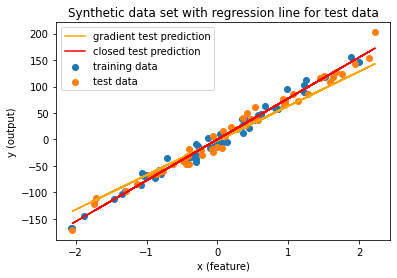

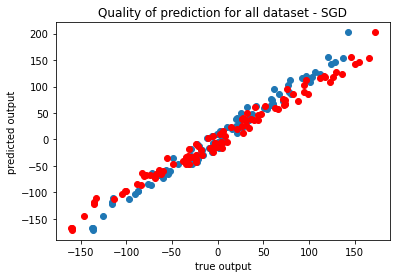

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)
X_train_feat = extract_polynomial_features(X_train, 1)
X_test_feat = extract_polynomial_features(X_test, 1)

model = LinearRegression()
model.fit(X_train_feat, y_train)
predict_test = model.predict(X_test_feat)

print(f'Error for  CLOSED training MSE: {model.get_error(predict_test, y_test, "MSE")}')
print(f'Error for  CLOSED training RMSE: {model.get_error(predict_test, y_test, "RMSE")}')

modelGD = LinearRegressionGD()
modelGD.train(X_train, y_train)

predict_train_GD = modelGD.predict(X_train)
predict_test_GD = modelGD.predict(X_test)


plt.scatter(X_train, y_train, label="training data")
plt.xlabel("x (feature)")
plt.ylabel("y (output)")
plt.title("Synthetic data set with regression line for test data")
plt.plot(X_test, predict_test_GD, label="gradient test prediction", color="orange")
plt.plot(X_test, predict_test, label="closed test prediction", color="red")
plt.scatter(X_test, y_test, label="test data")
#plt.plot(X_train, predict_train, label="trained prediction", color="red")
plt.legend()
plt.show()


predictGD = modelGD.predict(X)
plt.scatter(predictGD, y, label="Gradient Decent")
plt.xlabel("true output")
plt.ylabel("predicted output")
plt.title("Quality of prediction for all dataset - SGD")

X_feat = extract_polynomial_features(X, 1)
predict = model.predict(X_feat)
plt.scatter(predict, y, color="red", label="Closed regression")
plt.show()




Test Gradient Descent for complex scenario

Error for  CLOSED training MSE: 0.19290715837722414
Error for  CLOSED training RMSE: 0.4392119743099272
---- TRAINING STARTED ----
EPOCH: 0 => Error: 1.7835073864171078
EPOCH: 1 => Error: 1.2406397950888683
EPOCH: 2 => Error: 1.0641203515047464
EPOCH: 3 => Error: 0.950333563970523
EPOCH: 4 => Error: 0.8707349159246576
EPOCH: 5 => Error: 0.8110255759083985
EPOCH: 6 => Error: 0.7633869539094122
EPOCH: 7 => Error: 0.7234768831676177
EPOCH: 8 => Error: 0.6888318745328942
EPOCH: 9 => Error: 0.658010845444156
EPOCH: 10 => Error: 0.6301351726449174
EPOCH: 11 => Error: 0.6046407717216171
EPOCH: 12 => Error: 0.5811437306411685
EPOCH: 13 => Error: 0.5593668637216159
EPOCH: 14 => Error: 0.5390990384448507
EPOCH: 15 => Error: 0.5201722093589867
EPOCH: 16 => Error: 0.5024480842440227
EPOCH: 17 => Error: 0.48581008523969066
EPOCH: 18 => Error: 0.47015826716166303
EPOCH: 19 => Error: 0.45540592611065245
EPOCH: 20 => Error: 0.4414772059946718
EPOCH: 21 => Error: 0.4283053196526654
EPOCH: 22 => Error: 

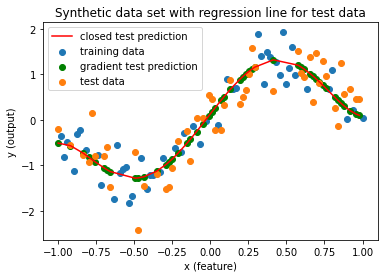

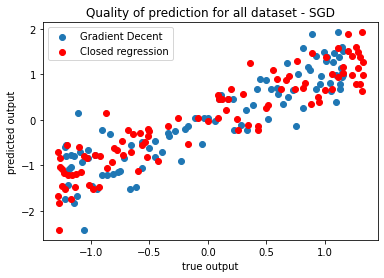

In [ ]:
M = 5 #@param {type: "slider", default: 8, min: 1, max: 100}
X_train, X_test, y_train, y_test = train_test_split(x, sine_wave, test_size=0.5)
X_train_feat = extract_polynomial_features(X_train, M)
X_test_feat = extract_polynomial_features(X_test, M)
model = LinearRegression()
model.fit(X_train_feat, y_train)
predict_test = model.predict(X_test_feat)

print(f'Error for  CLOSED training MSE: {model.get_error(predict_test, y_test, "MSE")}')
print(f'Error for  CLOSED training RMSE: {model.get_error(predict_test, y_test, "RMSE")}')

epochs_no = 100
modelGD = LinearRegressionGD()
modelGD.train(X_train_feat, y_train, epochs_no=epochs_no, lr=.01)

predict_train_GD = model.predict(X_train_feat)
predict_test_GD = model.predict(X_test_feat)


plt.scatter(X_train, y_train, label="training data")
plt.xlabel("x (feature)")
plt.ylabel("y (output)")
plt.title("Synthetic data set with regression line for test data")
plt.scatter(X_test, predict_test_GD, label="gradient test prediction", color="green")
xt, yt = zip(*sorted(zip(X_test, predict_test)))
plt.plot(xt, yt, label="closed test prediction", color="red")
plt.scatter(X_test, y_test, label="test data")
plt.legend()
plt.show()


X_feat = extract_polynomial_features(x, M)
predictGD = modelGD.predict(X_feat)
plt.scatter(predictGD, sine_wave, label="Gradient Decent")
plt.xlabel("true output")
plt.ylabel("predicted output")
plt.title("Quality of prediction for all dataset - SGD")
predict = model.predict(X_feat)
plt.scatter(predict, sine_wave, color="red", label="Closed regression")
plt.legend()
plt.show()

Compare different learning rates for Gradient Descent.